In [2]:
#importing the module of the api that will be used
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON

In [3]:
#initializing key variables
api_key = 'Your API key here'
api_service_name = "youtube"
api_version = "v3"


In [4]:
#Youtube channel names
#El cuartico, 
#Escuela de Nada, 
#Nos Reiremos de Esto,
#Jasy y Neisser, 
#El Super Increible Podcast de Nanutria, 
#El Podcast de la Diversion, 
#El Humano es un Animal,
#BLA BLA BLA

In [5]:
#Youtube channel IDs
#More Channels can be added
channel_ids = ['UCS1u11uPQCrGwhfiQwceayA',
               'UCZbq1qvbQzxDGUyuoPnF4LQ', 
               'UCZ4-r3oIR6xgiA7V7_F4pFw', 
               'UCQS3PooptNYNhs4-RIl-a2A', 
               'UC7Iabt-Qo5I5c8-cnwTHiWg', 
              'UCHlFByiv8ia44ArSWghLI3w', 
              'UCo8ifS6JKfDqV33pwAMeV0Q', 
              'UCxS_BFN-UtDEFp8p6vugsZQ',]

print(channel_ids)

['UCS1u11uPQCrGwhfiQwceayA', 'UCZbq1qvbQzxDGUyuoPnF4LQ', 'UCZ4-r3oIR6xgiA7V7_F4pFw', 'UCQS3PooptNYNhs4-RIl-a2A', 'UC7Iabt-Qo5I5c8-cnwTHiWg', 'UCHlFByiv8ia44ArSWghLI3w', 'UCo8ifS6JKfDqV33pwAMeV0Q', 'UCxS_BFN-UtDEFp8p6vugsZQ']


In [6]:
#code snipet from the api documentation 
#api_service_name = "youtube"
    #api_version = "v3"
    #client_secrets_file = "YOUR_CLIENT_SECRET_FILE.json"

    # Get credentials and create an API client
    #flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
        #client_secrets_file, scopes)
    #credentials = flow.run_console()
    #youtube = googleapiclient.discovery.build(
        #api_service_name, api_version, credentials=credentials)

    #request = youtube.channels().list(
        #part="snippet,contentDetails,statistics",
        #id=','.join(channel_ids) #using ',''.join() to concatenate the channel ids with comas
    #)
    #response = request.execute()

    #print(response)

In [7]:
#Get credentials and create an API client instead of credentials, developerkey will be used with the api_key
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [8]:
#code snipet from the api documentation modified to use the api key
#request the data from the YT channels
request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=','.join(channel_ids)
)

response = request.execute()

JSON(response) 

<IPython.core.display.JSON object>

In [9]:
#function to get the data from the channels
def get_channels(youtube, channel_ids):
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )

    response = request.execute()

    JSON(response)
    
    #loop through items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
               'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlist': item['contentDetails']['relatedPlaylists']['uploads']
               }
        
        all_data.append(data)
        
    return(pd.DataFrame(all_data))

In [10]:
channel_stats = get_channels(youtube, channel_ids)

In [11]:
channel_stats

,channelName,subscribers,views,totalVideos,playlist
0,El Cuartico,33400,4026089,127,UUS1u11uPQCrGwhfiQwceayA
1,nanutria,114000,10209515,234,UU7Iabt-Qo5I5c8-cnwTHiWg
2,Escuela de Nada,256000,39924159,405,UUZbq1qvbQzxDGUyuoPnF4LQ
3,Led Varela,193000,14299156,210,UUxS_BFN-UtDEFp8p6vugsZQ
4,Nos Reiremos de Esto!,82600,20469224,422,UUZ4-r3oIR6xgiA7V7_F4pFw
5,El Podcast de La Diversión,1610,43645,43,UUHlFByiv8ia44ArSWghLI3w
6,Jóse R Guzmán,87700,7036908,344,UUo8ifS6JKfDqV33pwAMeV0Q
7,Jasy y Neisser,9950,422384,64,UUQS3PooptNYNhs4-RIl-a2A


In [12]:
#channel_stats.dtypes

In [13]:
channel_stats=channel_stats.astype({'subscribers':int, 'views':int, 'totalVideos':int})

In [14]:
#channel_stats.dtypes

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(4,7))
%matplotlib inline

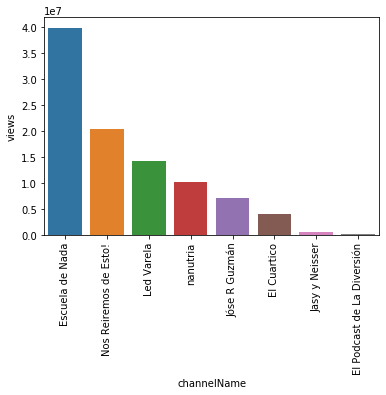

In [16]:
ax = sns.barplot(x='channelName', y='views', data=channel_stats.sort_values('views', ascending=False))
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [17]:
#the playlist code of the YT channels

#videoList = ['UUZ4-r3oIR6xgiA7V7_F4pFw', 
              #'UUQS3PooptNYNhs4-RIl-a2A', 
              #'UUo8ifS6JKfDqV33pwAMeV0Q', 
              #'UUS1u11uPQCrGwhfiQwceayA', 
              #'UU7Iabt-Qo5I5c8-cnwTHiWg', 
              #'UUZbq1qvbQzxDGUyuoPnF4LQ', 
              #'UUxS_BFN-UtDEFp8p6vugsZQ', 
              #'UUHlFByiv8ia44ArSWghLI3w']

In [18]:
#videoList = list(channel_stats["playlist"])

#print(videoList)

In [19]:
#code snippet from the api documentation used to get data of the video

request = youtube.playlistItems().list(
    part="snippet, contentDetails",
    playlistId='UUZbq1qvbQzxDGUyuoPnF4LQ'
)
response = request.execute()

JSON(response)

<IPython.core.display.JSON object>

In [20]:
#making the snippet to get the video data into a function

playlist_id = 'UUZbq1qvbQzxDGUyuoPnF4LQ'

def get_video_ids(youtube, playlist_id):
    
    video_ids=[]
    
    request = youtube.playlistItems().list(
        part="snippet, contentDetails",
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part="contentDetails",
            playlistId=playlist_id,
            maxResults=50,
            pageToken = next_page_token
        )
        response = request.execute()
    
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
            
        next_page_token = response.get('nextPageToken')
        
    return video_ids

In [21]:
video_ids = get_video_ids(youtube, playlist_id)

In [22]:
#counting the number of videos
len(video_ids)

405

In [23]:
#code snippet from the api documentation used to get data of the video slight modified to use the first 5 video ids already obtained

request = youtube.videos().list(
    part="snippet, contentDetails, statistics",
    id=video_ids[0:5],
)
response = request.execute()
JSON(response)

<IPython.core.display.JSON object>

In [24]:
def get_video_details(youtube, video_ids):
    
    all_video_info = []
    
    for v in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet, contentDetails, statistics',
            id=','.join(video_ids[v:v+50])
        )
        response = request.execute()
    
        for video in response['items']:
            stats = {'snippet':['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                    'contentDetails':['duration', 'definition', 'caption'],
                    'statistics':['viewCount', 'likeCount', 'favoriteCount', 'commentCount']}

            video_info={}
            video_info['video_id'] = video['id']

            for s in stats.keys():
                for t in stats[s]:
                    try:
                        video_info[t] = video[s][t]
                    except:
                        video_info[t] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)
    

In [25]:
videos_df = get_video_details(youtube, video_ids)

videos_df

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount
0,yZ6hb_0JRyY,Escuela de Nada,"Estatus de gira: Bad Bunny, Dr. Strange y el R...","En esta ocasión Chris, Leo y Nacho hacen un re...",None,2022-05-09T00:00:48Z,PT44M,hd,false,82081,4017,0,241
1,C7bk0wpBmgk,Escuela de Nada,La mamá de Jóse pensaba que hacía brujería,Un pequeño trailer de lo que sucedió el pasado...,None,2022-05-07T20:30:51Z,PT2M30S,hd,false,22526,987,0,27
2,H5JUu8Lgjt8,Escuela de Nada,La definición de la locura feat. Jóse Rafael G...,"En esta ocasión Chris, Leo y Nacho reciben a J...",None,2022-05-05T00:00:25Z,PT1H17M41S,hd,false,181821,7294,0,587
3,61tABNIxk18,Escuela de Nada,Los masajes y la relajación máxima - EP #368,"En esta ocasión Leo, Chris y Nacho hablan sobr...",None,2022-05-02T00:01:35Z,PT39M15S,hd,false,82912,3568,0,216
4,ttcbONWZ2C4,Escuela de Nada,La importancia de la educación financiera en e...,Un pequeño trailer de lo que sucedió el pasado...,None,2022-05-01T20:13:54Z,PT2M51S,hd,false,13066,500,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,8UG4DbrNhmA,Escuela de Nada,Relaciones curiosas y la de Thomas Middleditch...,"En esta ocasión Chris, Leo y Nacho hablan sobr...",None,2019-10-14T00:16:26Z,PT40M11S,hd,false,84037,3523,0,242
401,ta_uaIPgE2w,Escuela de Nada,[TRAILER] Episodio exclusivo - Controversias d...,"En esta ocasión Chris, Leo y Nacho opinan sobr...",None,2019-10-12T15:48:43Z,PT49S,hd,false,9670,401,0,25
402,HWA3YlCQp9s,Escuela de Nada,¿Cómo saber si vas a coger? - EP #102,"En esta ocasión Chris, Leo y Nacho hablan sobr...","[escuela de nada, como saber si vas a coger, e...",2019-10-10T00:05:01Z,PT42M14S,hd,false,205438,9120,0,636
403,k0J6YXP05Uc,Escuela de Nada,Las disonancias cognitivas y vivir en Australi...,"En esta ocasión Leo, Nacho y Chris hablan sobr...",None,2019-10-06T23:49:09Z,PT42M4S,hd,false,88170,3837,0,260


In [26]:
#cheking for null values

videos_df.isnull().any()

video_id         False
channelTitle     False
title            False
description      False
tags              True
publishedAt      False
duration         False
definition       False
caption          False
viewCount        False
likeCount        False
favoriteCount    False
commentCount     False
dtype: bool

In [27]:
#changing data types of the viewCount, likeCount, favoriteCount and commentCount columns
#changing the data frame name to reflect the podcast name Escuela de Nada; EDN

EDN_videos_df=videos_df.astype({'viewCount':int, 'likeCount':int, 'favoriteCount':int, 'commentCount':int})

In [29]:
EDN_videos_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
duration         object
definition       object
caption          object
viewCount         int32
likeCount         int32
favoriteCount     int32
commentCount      int32
dtype: object

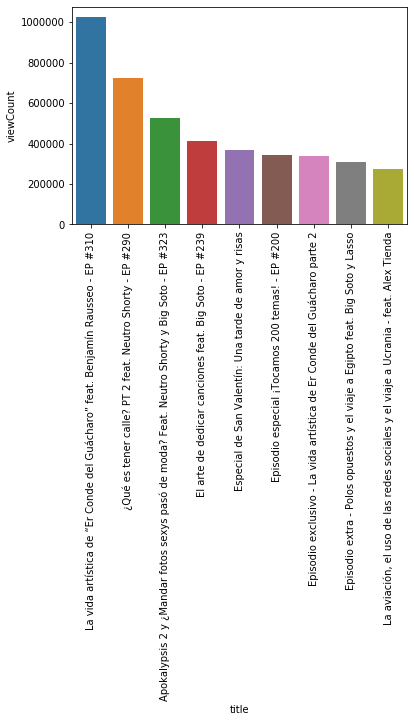

In [32]:
#EDN best performing videos

ax = sns.barplot(x='title', y='viewCount', data=EDN_videos_df.sort_values('viewCount', ascending=False) [0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

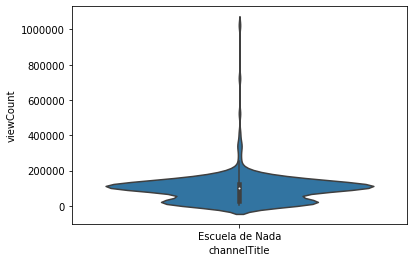

In [56]:
sns.violinplot(EDN_videos_df['channelTitle'], EDN_videos_df['viewCount'])

In [43]:
#updating the playlist id to next channel of the list

playlist_id = 'UUQS3PooptNYNhs4-RIl-a2A'

In [44]:
video_ids = get_video_ids(youtube, playlist_id)

In [45]:
videos_df = get_video_details(youtube, video_ids)

videos_df

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount
0,ivr5BnmzyV0,Jasy y Neisser,LE PEDÍ SER MI NOVIA 💘 #shorts,#shorts #viral #viralvideo #jasyneisser,None,2022-05-07T14:35:30Z,PT1M1S,hd,false,423,57,0,7
1,XmHk0Dgje_Y,Jasy y Neisser,Jasy y Neisser EP 48 - ¿CÓMO ES SER DRAG EN VE...,Jasy y Neisser - EP 48 ¿CÓMO SER DRAG EN VENEZ...,None,2022-05-05T23:30:11Z,PT1H14M14S,hd,false,4834,352,0,81
2,0l435OUpQaI,Jasy y Neisser,se c4gó en el patio💩 #shorts #viral,,None,2022-05-03T21:18:45Z,PT38S,hd,false,202,20,0,2
3,j7MXzeVkPxQ,Jasy y Neisser,El Titanic 😭 #shorts,#shorts #viral #viralvideo,None,2022-04-29T16:35:19Z,PT32S,hd,false,253,39,0,1
4,QJ1vFGFk4RI,Jasy y Neisser,Jasy y Neisser - EP 47 ¿NOS VAMOS A EXTINGUIR? 😨😱,"Hablando sobre el cambio climático, la evoluci...","[jasy y Neisser, jasy del rey, neisser, escuel...",2022-04-28T23:30:10Z,PT1H6M7S,hd,false,5859,403,0,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,7C9flOjopqk,Jasy y Neisser,Jasy y Neisser - EP 5 - ¿Cómo se vive en Venez...,"Hola madres, estamos felices de que estén aquí...","[edn, escueladenada, nanutria, sipdn, gaboruiz...",2021-07-15T23:00:14Z,PT30M13S,hd,false,12666,1028,0,265
60,CoyMw1gQG80,Jasy y Neisser,"Jasy y Neisser - EP 4 - PIJAMADA: Bodyshaming,...",En este episodio especial y mas intimo de PIJA...,"[edn, escueladenada, nanutria, victornanutria,...",2021-07-08T23:00:11Z,PT28M15S,hd,false,13240,1135,0,148
61,MLfcMFOlvdY,Jasy y Neisser,"Jasy y Neisser - EP 3 - Élite, bachillerato y ...",En este episodio estaremos hablando de la cult...,"[escueladenada, edn, gaboruiz, elmundoyelpais,...",2021-07-01T22:00:27Z,PT28M40S,hd,false,18335,1614,0,243
62,yVZrTm2mn-8,Jasy y Neisser,Jasy y Neisser - EP 2 - Mujeres con historia y...,Nos hace muy feliz traerles el segundo episodi...,"[pride, gay, lgbt, queer, podcast, podcastlati...",2021-06-24T22:00:16Z,PT24M46S,hd,false,10680,1138,0,159


In [46]:
#cheking for null values

videos_df.isnull().any()

video_id         False
channelTitle     False
title            False
description      False
tags              True
publishedAt      False
duration         False
definition       False
caption          False
viewCount        False
likeCount        False
favoriteCount    False
commentCount      True
dtype: bool

In [48]:
#changing data types of the viewCount, likeCount, favoriteCount and commentCount columns
#changing the data frame name to reflect the podcast name Jasy y Neisser; JaN
#the comment count has null values and wont be converted to int

JaN_videos_df=videos_df.astype({'viewCount':int, 'likeCount':int, 'favoriteCount':int})

In [49]:
EDN_videos_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
duration         object
definition       object
caption          object
viewCount         int32
likeCount         int32
favoriteCount     int32
commentCount      int32
dtype: object

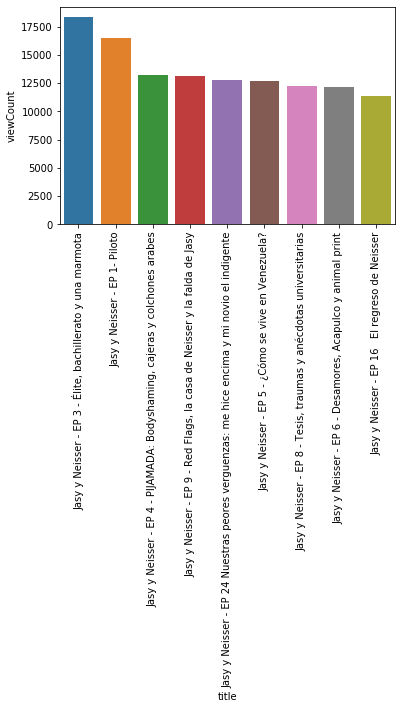

In [51]:
#JaN best performing videos

ax = sns.barplot(x='title', y='viewCount', data=JaN_videos_df.sort_values('viewCount', ascending=False) [0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

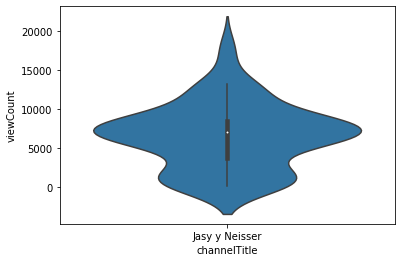

In [54]:
sns.violinplot(JaN_videos_df['channelTitle'], JaN_videos_df['viewCount'])